Files available in dataset:
ta_feng_all_months_merged.csv

DATA INSPECTION:

DF SHAPE: (817741, 9)

FEATURE TYPES:
TRANSACTION_DT      object
CUSTOMER_ID          int64
AGE_GROUP           object
PIN_CODE            object
PRODUCT_SUBCLASS     int64
PRODUCT_ID           int64
AMOUNT               int64
ASSET                int64
SALES_PRICE          int64
dtype: object

MISSING VALUES:
TRANSACTION_DT          0
CUSTOMER_ID             0
AGE_GROUP           22362
PIN_CODE                0
PRODUCT_SUBCLASS        0
PRODUCT_ID              0
AMOUNT                  0
ASSET                   0
SALES_PRICE             0
dtype: int64

NUMERICAL FEATURES SUMMARY:
       CUSTOMER_ID  PRODUCT_SUBCLASS       PRODUCT_ID    AMOUNT     ASSET  \
count    817741.00         817741.00        817741.00 817741.00 817741.00   
mean    1406620.27         284950.50 4461639280529.18      1.38    112.11   
std      748978.39         226390.70 1690093349432.24      2.90    603.66   
min        1069.00         

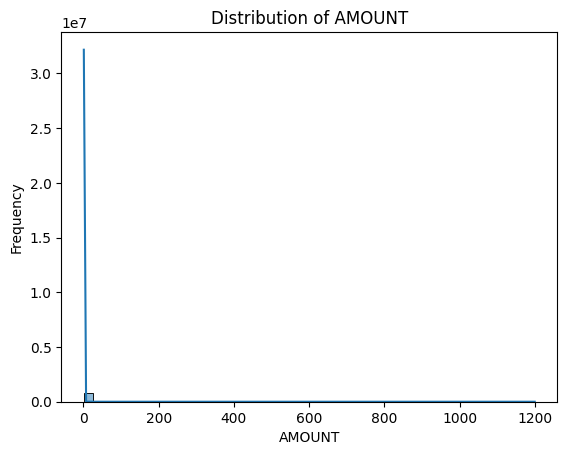

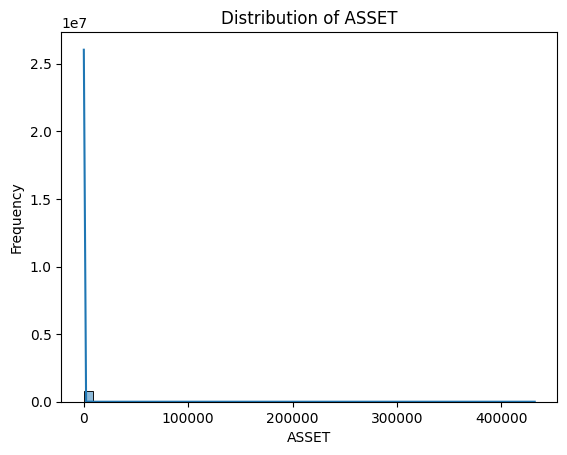

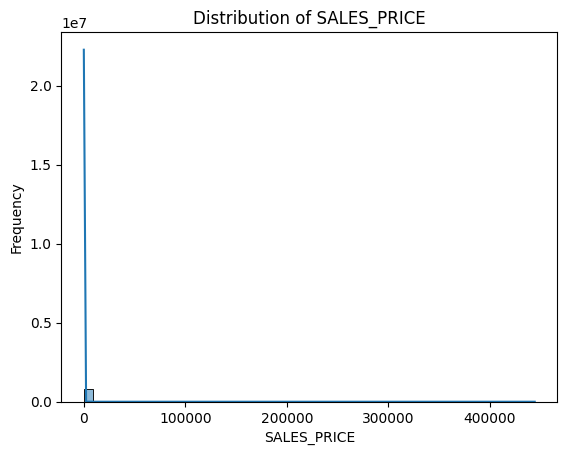

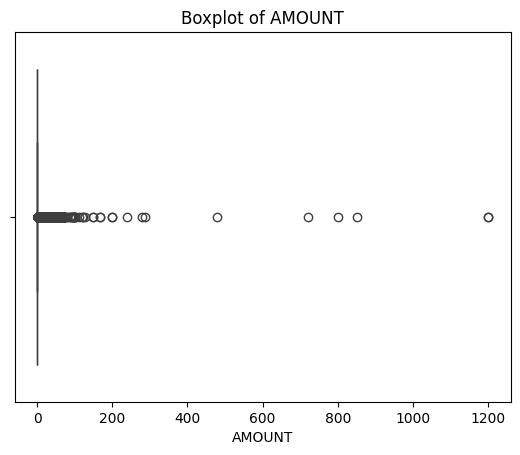

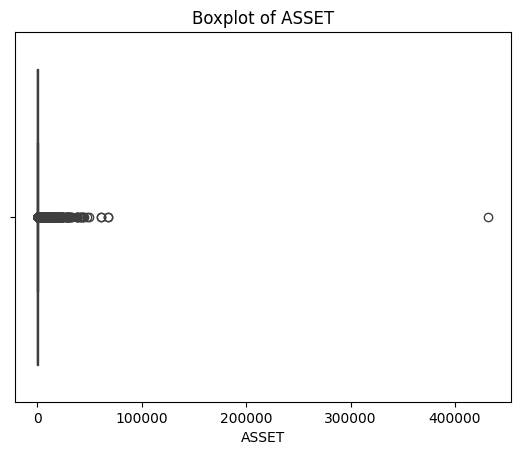

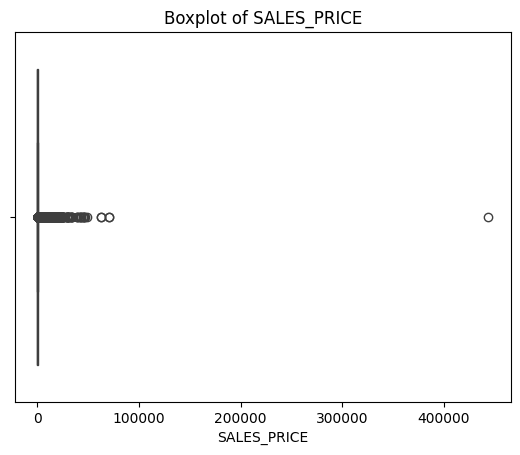

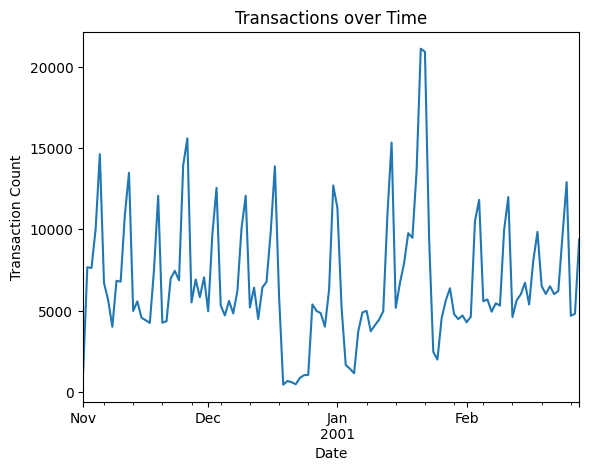

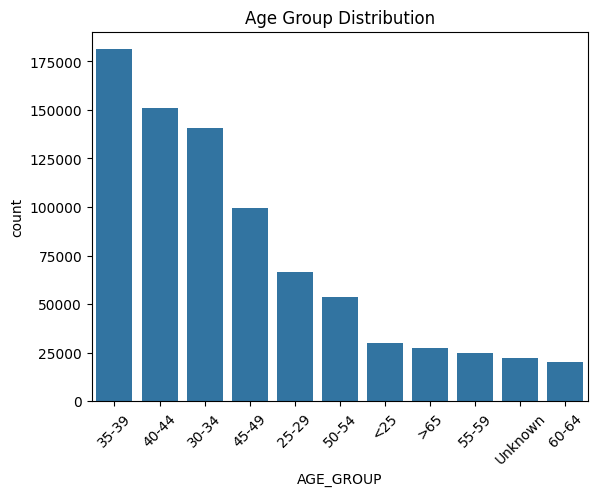

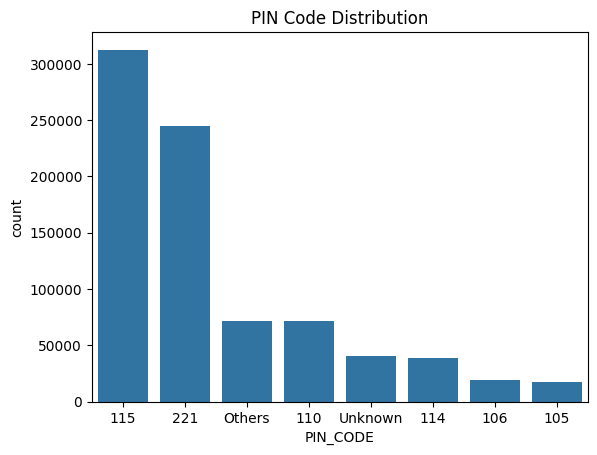

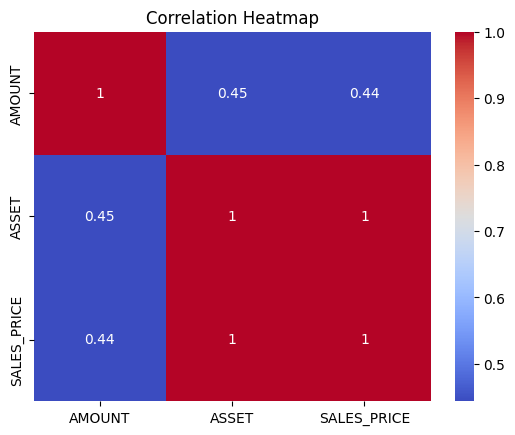

In [ ]:
from dotenv import load_dotenv
import pandas as pd
import os

load_dotenv()
path = os.getenv("DATASET_PATH")

if not path:
    raise ValueError("DATASET_PATH NOT FOUND")

print("Files available in dataset:")
DATA_FILE = None
for f in os.listdir(path):
    print(f)
    if f.endswith('.csv'):
        DATA_FILE = os.path.join(path, f)

if not DATA_FILE:
    raise ValueError("No CSV file found in dataset folder")

print("\nDATA INSPECTION:")
pd.set_option('display.float_format', '{:.2f}'.format)
df = pd.read_csv(DATA_FILE, encoding='utf-8-sig')

print("\nDF SHAPE:", df.shape)
print("\nFEATURE TYPES:")
print(df.dtypes)

print("\nMISSING VALUES:")
print(df.isnull().sum())

print("\nNUMERICAL FEATURES SUMMARY:")
print(df.describe())

print("\nCATEGORICAL FEATURES SUMMARY:")
print(df.describe(include=['object', 'category']))

print("\nMISSING VALUE PERCENTAGES:")
print((df.isnull().mean() * 100).round(2))

#data type fixes
df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'])
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(str)
df['PRODUCT_ID'] = df['PRODUCT_ID'].astype(str)
df['PRODUCT_SUBCLASS'] = df['PRODUCT_SUBCLASS'].astype(str)

#filter missing data
df['AGE_GROUP'] = df['AGE_GROUP'].fillna('Unknown')

#check duplicates
dup_count = df.duplicated().sum()

print(f"\nNumber of duplicate rows: {dup_count}")

print("\nData types after conversion:")
print(df.dtypes)

print("\nUnique AGE_GROUP values after cleaning:")
print(df['AGE_GROUP'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Numerical distributions
num_cols = ['AMOUNT', 'ASSET', 'SALES_PRICE']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots for outlier detection
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Transactions over time
plt.figure()
df['TRANSACTION_DT'].value_counts().sort_index().plot()
plt.title('Transactions over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

# Category distributions
plt.figure()
sns.countplot(data=df, x='AGE_GROUP', order=df['AGE_GROUP'].value_counts().index)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.countplot(data=df, x='PIN_CODE', order=df['PIN_CODE'].value_counts().index)
plt.title('PIN Code Distribution')
plt.show()

# Correlation heatmap (numeric only)
plt.figure()
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#PLOTS LOOK SCUFFED - JUST EXTREMELY RIGHT SKEWED
df['TRANSACTION_DT'] = pd.to_datetime(df['TRANSACTION_DT'])
id_like = ['CUSTOMER_ID', 'PRODUCT_ID', 'PRODUCT_SUBCLASS']
df[id_like] = df[id_like].astype('category')  # or str

print(df[id_like].describe())         # categorical summary
print(df[['AMOUNT','ASSET','SALES_PRICE']].describe())  # numeric summary
